In [113]:
# 1.(a) Load a dataset
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()
X = wine.data
y = wine.target

In [114]:
# 1.(b) Make the train/test split
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [115]:
from sklearn.preprocessing import StandardScaler
# Sdandardize the data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

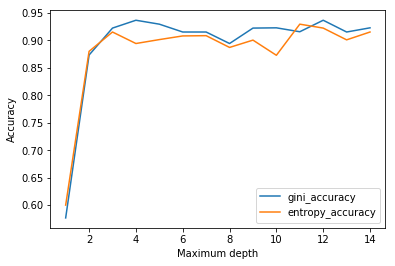

In [116]:
# 2. (a) Tuning Hyperparameters for decision tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# 10-fold Cross Vlidation after suffuling the data
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10,shuffle=True,random_state=42)


gini_accuracy = []
entropy_accuracy = []

for i in range(1,15):
    #gini
    tree_gini = DecisionTreeClassifier(criterion='gini',max_depth=i)
    clf_gini = tree_gini.fit(X_train_scaled,y_train)
    curGiniAccuracy = cross_val_score(clf_gini,X_train_scaled,y_train,cv = kfold,scoring = 'accuracy').mean()
    gini_accuracy.append(curGiniAccuracy)
    
    #entropy
    tree_entropy = DecisionTreeClassifier(criterion='entropy',max_depth=i)
    clf_entropy = tree_entropy.fit(X_train_scaled,y_train)
    curEntropyAccuracy = cross_val_score(clf_entropy,X_train_scaled,y_train,cv = kfold,scoring = 'accuracy').mean()
    entropy_accuracy.append(curEntropyAccuracy)
    
plt.plot(range(1,15),gini_accuracy,label = "gini_accuracy")
plt.plot(range(1,15),entropy_accuracy,label = "entropy_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Maximum depth")
plt.legend()
    
    

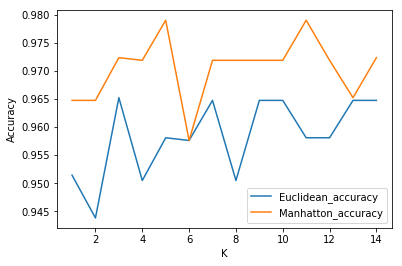

In [117]:
# 2. (b) Tuning Hyperparameters for KNN
from sklearn.neighbors import KNeighborsClassifier

euc_accuracy = []
man_accuracy = []

for i in range(1,15):
    #Euclidean
    knn_euc = KNeighborsClassifier(p=2,n_neighbors=i)
    clf_euc = knn_euc.fit(X_train_scaled,y_train)
    curEucAccuracy = cross_val_score(clf_euc,X_train_scaled,y_train,cv = kfold, scoring = 'accuracy').mean()
    euc_accuracy.append(curEucAccuracy)
    
    #Manhatton
    knn_man = KNeighborsClassifier(p=1,n_neighbors=i)
    clf_man = knn_man.fit(X_train_scaled,y_train)
    curManAccuracy = cross_val_score(clf_man,X_train_scaled,y_train,cv = kfold, scoring = 'accuracy').mean()
    man_accuracy.append(curManAccuracy)
    
plt.plot(range(1,15),euc_accuracy,label = "Euclidean_accuracy")
plt.plot(range(1,15),man_accuracy,label = "Manhatton_accuracy")
plt.ylabel("Accuracy")
plt.xlabel("K")
plt.legend()

In [90]:
# 2.(c) Tuning Hyperparameters for SVM
from sklearn.svm import SVC

#set some combinations of degree,gamma and C
degrees = [2,3]
gammas = [1/13,2/13,3/13,4/13] # 13 is the number of features
Cs = [1,1.5,2,2.5]

#Create an 2-D array to store the scores of each combination
N = [[0]* 4 for i in range(33)]
N[0][0] = 'degree'
N[0][1] = 'gamma'
N[0][2] = 'C'
N[0][3] = 'score'

num = 1
for degree in degrees:
    for gamma in gammas:
        for C in Cs:
            clf_svm = SVC(kernel='poly',degree=degree,gamma = gamma, C = C)
            clf_svm.fit(X_train_scaled,y_train)
            N[num][0] = degree
            N[num][1] = round(gamma,3)
            N[num][2] = C
            N[num][3] = round(cross_val_score(clf_svm,X_train_scaled,y_train,cv = kfold, scoring = 'accuracy').mean(),3)
            num += 1
            
N

[['degree', 'gamma', 'C', 'score'],
 [2, 0.077, 1, 0.916],
 [2, 0.077, 1.5, 0.93],
 [2, 0.077, 2, 0.923],
 [2, 0.077, 2.5, 0.923],
 [2, 0.154, 1, 0.917],
 [2, 0.154, 1.5, 0.91],
 [2, 0.154, 2, 0.91],
 [2, 0.154, 2.5, 0.895],
 [2, 0.231, 1, 0.902],
 [2, 0.231, 1.5, 0.91],
 [2, 0.231, 2, 0.91],
 [2, 0.231, 2.5, 0.917],
 [2, 0.308, 1, 0.91],
 [2, 0.308, 1.5, 0.917],
 [2, 0.308, 2, 0.917],
 [2, 0.308, 2.5, 0.917],
 [3, 0.077, 1, 0.93],
 [3, 0.077, 1.5, 0.951],
 [3, 0.077, 2, 0.951],
 [3, 0.077, 2.5, 0.958],
 [3, 0.154, 1, 0.972],
 [3, 0.154, 1.5, 0.965],
 [3, 0.154, 2, 0.965],
 [3, 0.154, 2.5, 0.965],
 [3, 0.231, 1, 0.965],
 [3, 0.231, 1.5, 0.965],
 [3, 0.231, 2, 0.965],
 [3, 0.231, 2.5, 0.965],
 [3, 0.308, 1, 0.965],
 [3, 0.308, 1.5, 0.965],
 [3, 0.308, 2, 0.965],
 [3, 0.308, 2.5, 0.965]]

In [118]:
# 3.(a)
#Decision tree
tree_gini = DecisionTreeClassifier(criterion='gini',max_depth=4)
clf_gini = tree_gini.fit(X_train_scaled,y_train)

#KNN
knn_man = KNeighborsClassifier(p=1,n_neighbors=5)
clf_man = knn_man.fit(X_train_scaled,y_train)

#SVM
clf_svm = SVC(kernel='poly',degree=3,gamma = 2/13, C = 1)
clf_svm.fit(X_train_scaled,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.15384615384615385,
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [119]:
#3.(b)
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian_model = GaussianNB()
clf_gnb = gaussian_model.fit(X_train_scaled,y_train)

In [120]:
#3.(c)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

#Create an 2-D array to store the scores of each model
N = [['']* 5 for i in range(4)]
N[0][0] = '      '
N[0][1] = 'Tree'
N[0][2] = 'KNN'
N[0][3] = 'SVM'
N[0][4] = 'GNB'
N[1][0] = 'accuracy'
N[2][0] = 'precision'
N[3][0] = 'recall'

y_pred_tree = clf_gini.predict(X_test_scaled)
y_pred_knn = clf_man.predict(X_test_scaled)
y_pred_svm = clf_svm.predict(X_test_scaled)
y_pred_gnb = clf_gnb.predict(X_test_scaled)

N[1][1] = round(accuracy_score(y_test, y_pred_tree),3)
N[1][2] = round(accuracy_score(y_test, y_pred_knn),3)
N[1][3] = round(accuracy_score(y_test, y_pred_svm),3)
N[1][4] = round(accuracy_score(y_test, y_pred_gnb),3)
N[2][1] = round(precision_score(y_test, y_pred_tree,average='weighted'),3)
N[2][2] = round(precision_score(y_test, y_pred_knn,average='weighted'),3)
N[2][3] = round(precision_score(y_test, y_pred_svm,average='weighted'),3)
N[2][4] = round(precision_score(y_test, y_pred_gnb,average='weighted'),3)
N[3][1] = round(recall_score(y_test, y_pred_tree,average='weighted'),3)
N[3][2] = round(recall_score(y_test, y_pred_knn,average='weighted'),3)
N[3][3] = round(recall_score(y_test, y_pred_svm,average='weighted'),3)
N[3][4] = round(recall_score(y_test, y_pred_gnb,average='weighted'),3)

N

[['      ', 'Tree', 'KNN', 'SVM', 'GNB'],
 ['accuracy', 0.944, 0.972, 0.944, 0.972],
 ['precision', 0.951, 0.975, 0.949, 0.974],
 ['recall', 0.944, 0.972, 0.944, 0.972]]

Text(83.4,0.5,'Predicted label')

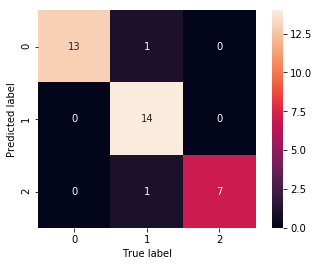

In [121]:
#3.(d)Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#decision tree
mat_tree = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(mat_tree, square=True,annot=True,fmt='d',cbar=True)
plt.xlabel('True label')
plt.ylabel('Predicted label')

Text(83.4,0.5,'Predicted label')

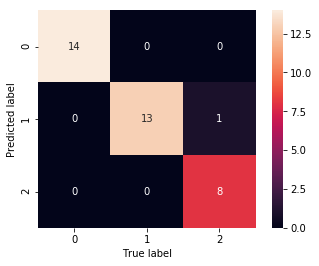

In [122]:
#knn
mat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(mat_knn, square=True,annot=True,fmt='d',cbar=True)
plt.xlabel('True label')
plt.ylabel('Predicted label')

Text(83.4,0.5,'Predicted label')

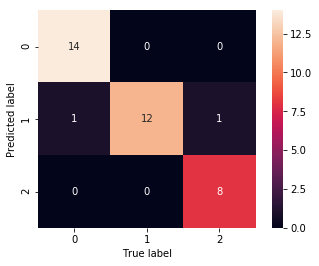

In [123]:
#SVM
mat_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(mat_svm, square=True,annot=True,fmt='d',cbar=True)
plt.xlabel('True label')
plt.ylabel('Predicted label')

Text(83.4,0.5,'Predicted label')

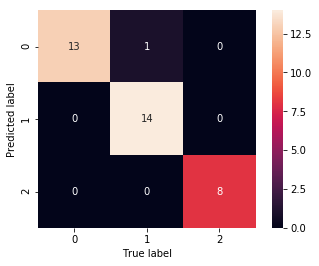

In [124]:
#Gaussian Naive Bayes
mat_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(mat_gnb, square=True,annot=True,fmt='d',cbar=True)
plt.xlabel('True label')
plt.ylabel('Predicted label')